In [1]:
# importing the relevant libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the iris dataset
from sklearn.datasets import load_iris

In [3]:
# getting the iris dataset & checking what is present inside it
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
# checking feature names of iris
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# checking the iris data stored in a number forms
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# checking the target_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# getting the function of sklearn to split the data
from sklearn.model_selection import train_test_split

In [8]:
# splitting the data into two train & test with train size as 0.8
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,train_size=0.8)

In [9]:
# checking the sahpe of training data
x_train.shape

(120, 4)

In [10]:
# checking the sahpe of test data
x_test.shape

(30, 4)

In [11]:
# getting the necessary model of sklearn
from sklearn.linear_model import LogisticRegression

In [12]:
# Train the model
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
# Predicting the category
y_predicted = model.predict(x_test)

In [14]:
# getting the particular target category in data at 111 position
iris.target[111]

2

In [15]:
raw_data = pd.DataFrame(iris.data,columns=iris.feature_names)
raw_data['class'] = iris.target
raw_data.sample(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
88,5.6,3.0,4.1,1.3,1
23,5.1,3.3,1.7,0.5,0
108,6.7,2.5,5.8,1.8,2
66,5.6,3.0,4.5,1.5,1
86,6.7,3.1,4.7,1.5,1
9,4.9,3.1,1.5,0.1,0
135,7.7,3.0,6.1,2.3,2
148,6.2,3.4,5.4,2.3,2


In [16]:
iris.data[[111]]

array([[6.4, 2.7, 5.3, 1.9]])

In [17]:
# checking it with predicted one
model.predict(iris.data[[111]])

array([2])

So from above we can see that true value is 2 and predicted category is also 2. That means its virginica iris flower.

In [18]:
# getting the accuracy of model
model.score(x_test,y_test)

0.8666666666666667

In [19]:
# getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  4,  8]], dtype=int64)

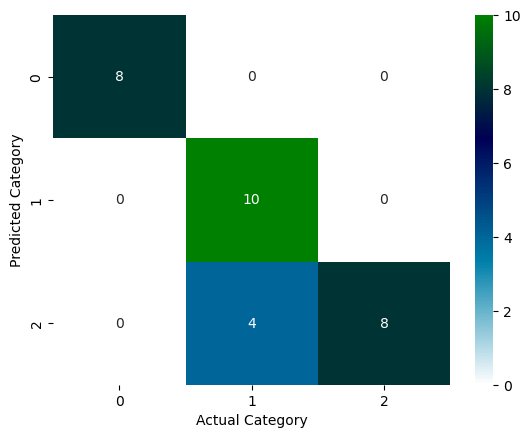

In [20]:
# plotting the confusion matrix
sns.heatmap(cm,cmap='ocean_r',annot=True)
plt.xlabel("Actual Category")
plt.ylabel("Predicted Category")
plt.show()

From above we can conclude that 2 times actual category was 1 (versicolor) but model predicted 2 (virginica). So in these 2 cases model failed. But at other 28 sammples model predicted accurately.

In [21]:
model.predict_proba([[6.4, 2.7, 5.3, 1.9]])

array([[1.64822214e-04, 1.94328147e-01, 8.05507031e-01]])

In [46]:
import numpy as np

# Example probabilities predicted by the mo

proba = model.predict_proba([[6.4, 2.7, 5.3, 1.9]])
# Obtain the index of the highest probability
predicted_class_index = np.argmax(proba)

# Define a lookup table or dictionary to map the index to the class label
class_labels = {
    0: "Class A",
    1: "Class B",
    2: "Class C"
}

# Lookup the class label based on the predicted class index
predicted_class_label = class_labels[predicted_class_index]
print('index',predicted_class_index)
print(predicted_class_label) # Output: "Class B"


index 2
Class C


In [ ]:
import pickle

In [ ]:
with open ('iris_classification.pkl','wb') as f:
    pickle.dump(model,f)b